# Домашнее задание по обучению сверточной сети

В этом задании вы сами (с небольшой помощью) обучите нейронную сеть для классификации кошек и собак!

Ниже приводится код для считывания данных аналогичный прошлому уроку, поэтому можете его просто запустить.

*Не забудьте добавить в Runtime GPU для ускорения вычислений*.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [ ]:
%tensorflow_version
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
! ls /root/.keras/datasets/cats_and_dogs_filtered

train  validation  vectorize.py


In [ ]:
base_dir = Path(zip_dir).parent / "cats_and_dogs_filtered"
train_dir = base_dir / 'train'
validation_dir = base_dir / 'validation'

train_cats_dir = train_dir / 'cats'
train_dogs_dir = train_dir / 'dogs'
validation_cats_dir = validation_dir / 'cats'
validation_dogs_dir = validation_dir / 'dogs'

In [ ]:
num_cats_tr = len(list(train_cats_dir.glob("*")))
num_dogs_tr = len(list(train_dogs_dir.glob("*")))

num_cats_val = len(list(validation_cats_dir.glob("*")))
num_dogs_val = len(list(validation_dogs_dir.glob("*")))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [ ]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [ ]:
BATCH_SIZE = 100
IMG_SHAPE  = 150

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
sample_training_images, sample_labels = next(train_data_gen)

In [ ]:
_val_images, _val_labels = next(val_data_gen)
next(val_data_gen)[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [ ]:
def show_catsdogs(images, labels, predicted_labels=None):
    names = {0: "Cat", 1: "Dog"}
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

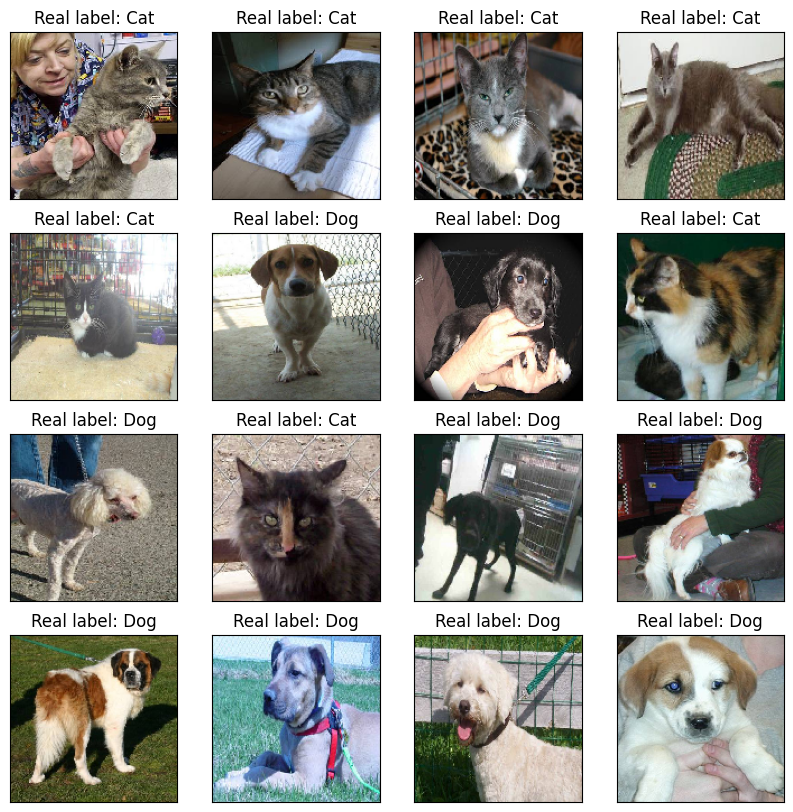

In [ ]:
show_catsdogs(sample_training_images, sample_labels)

# Определение модели

**Задание**

Определите модель аналогично модели из урока с классификации одежды.

1. Используйте сверточные слои с размером фильтра (3,3) и relu активацией. Можно оставить паддинг по умолчанию.
2. После каждого сверточного слоя применяйте MaxPool, уменьшающий размер в два раза
3. Увеличивайте количество фильтров в два раза после каждого пуллинга до 128, начиная с 32. Таким образом вы добывите три блока conv+pool
4. Добавьте еще один conv+pool блок с 128 фильтрами
5. Используйте Flatten(), чтобы превратить последний тензор в вектор
6. Добавьте полносвязный слой на 128 признаков
7. Добавьте выходной слой с активацией sigmoid



In [ ]:
sample_training_images[0].shape

(100, 150, 150, 3)

In [ ]:
# < YOUR CODE STARTS HERE >
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


model = tf.keras.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same', activation='relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu')),
model.add(MaxPooling2D(pool_size = 2))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

# < YOUR CODE ENDS HERE >
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [ ]:
# должно получиться около 1 000 000 параметров
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 128)     

In [ ]:
# для более удобного и наглядного отображения обучения мы воспользуемся библиотекой,
# которая реализует коллбек, отображающий кривые обучения в режиме реального времени.
!pip install livelossplot
from livelossplot.tf_keras import PlotLossesCallback

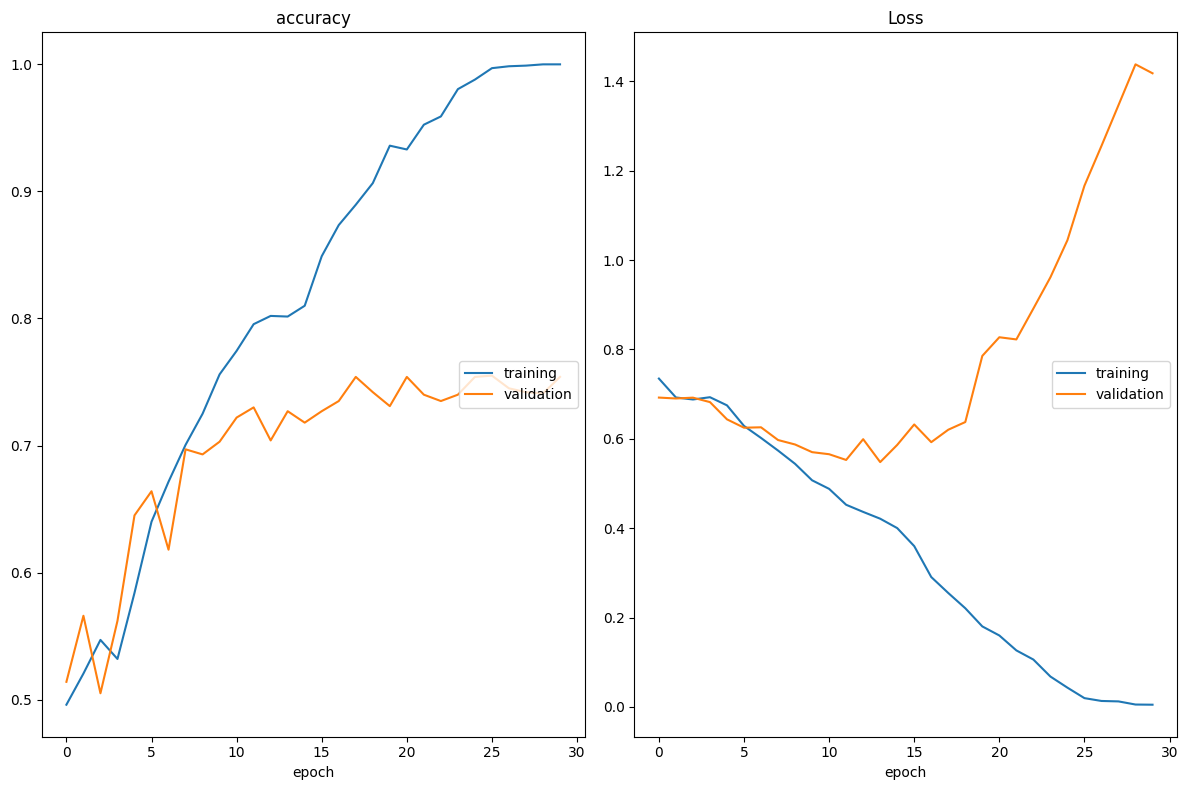

accuracy
	training         	 (min:    0.496, max:    1.000, cur:    1.000)
	validation       	 (min:    0.505, max:    0.755, cur:    0.754)
Loss
	training         	 (min:    0.005, max:    0.735, cur:    0.005)
	validation       	 (min:    0.548, max:    1.438, cur:    1.418)
20/20 [==============================] - 6s 279ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.4179 - val_accuracy: 0.7540


In [ ]:
# указанными параметрами спустя 30 эпох вы увидите точность около 75%.
# если вас что-то насторожит в графиках, запомните это, это нормально :)
EPOCHS = 30
history = model.fit_generator(train_data_gen,
                              epochs=EPOCHS,
                              validation_data=val_data_gen,
                              callbacks=[PlotLossesCallback()]) # мы добавили коллбек для отрисовки прогресса

Теперь посмотрим на предсказания нашей сети:

Found 1000 images belonging to 2 classes.
4/4 [==============================] - 0s 10ms/step


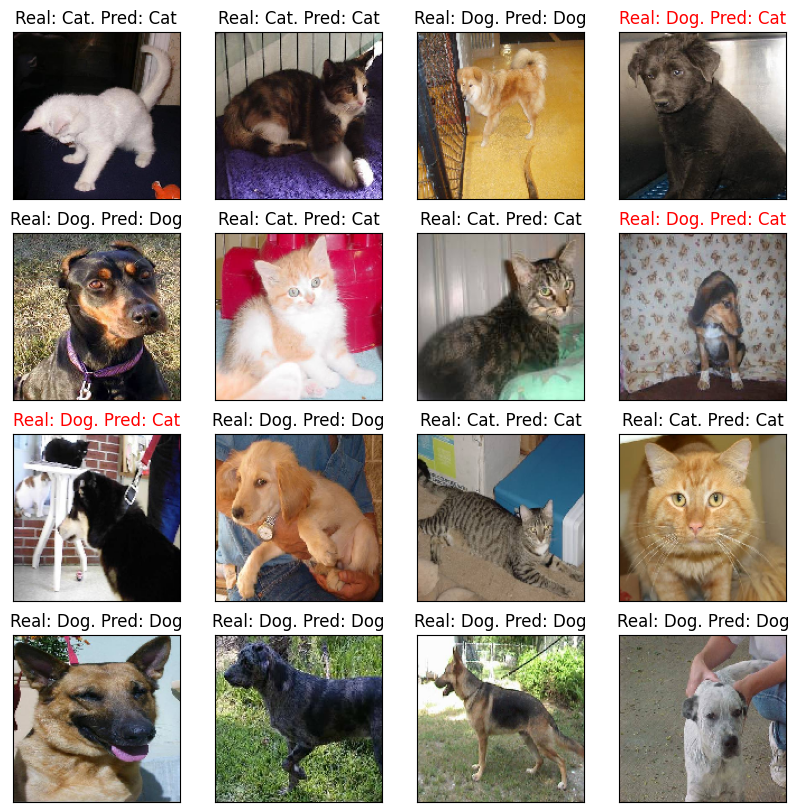

In [ ]:
shuffle_val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')
sample_validation_images, sample_validation_labels = next(shuffle_val_data_gen)
predicted = model.predict(sample_validation_images).flatten()
###
predicted = np.where(predicted>0.5, 1, 0)
###
show_catsdogs(sample_validation_images, sample_validation_labels, predicted)

 # Заключение

 В этом задании вы получили классификатор кошек и собак, который имеет точность на валидации около 75%. Поздравляем!

Но вы не могли не заметить, что точность на трейне -- 100%. Это явный признак переобучения. Сможем ли мы избавиться от переобучения? Увидим с следующем уроке.